In [205]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [206]:
import sklearn
import numpy as np
import re
import string
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def preprocess(corpus):
    # Create a set of stopwords
    stopwords_english = set(stopwords.words('english'))

    cleaned_corpus = []
    for text in corpus:
        # Lowercase
        text = text.lower()
        # Remove links
        text = re.sub(r'https?://[^\s\n\r]+', '', text)
        # Remove punctuation
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        # Remove words containing numbers
        text = re.sub(r'\w*\d\w*', '', text)
        # Tokenize and remove stopwords
        words = text.split()
        words = [word for word in words if word not in stopwords_english]
        cleaned_corpus.append(' '.join(words))
    return cleaned_corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amreshsenathirajah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
X = train['comment_text']
y = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [197]:
#Create a new subset of the data by only taking the 2nd column onwards
data_count=train.iloc[:,2:].sum()
print(data_count)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


159571


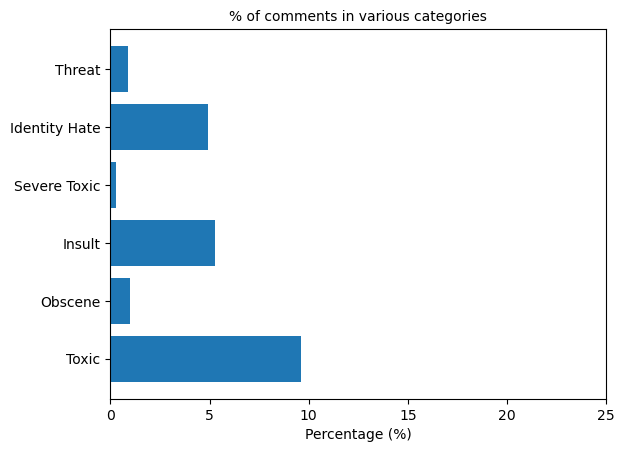

In [198]:
# Create a bar graph 

num_rows = len(train)
print(num_rows)
total_toxicity = train['toxic'].sum() / num_rows * 100
total_severe_toxicity = train['severe_toxic'].sum() / num_rows * 100
total_obscene = train['obscene'].sum() / num_rows * 100
total_threat = train['threat'].sum() / num_rows * 100
total_insult = train['insult'].sum() / num_rows * 100
total_identity_hate = train['identity_hate'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
index = np.arange(6)

# Let the index variable be the x-axis, whereas the % of toxicity for each category be the y-axis.

bar_g = plt.barh(index, [total_toxicity, total_severe_toxicity, total_obscene, total_threat, total_insult, total_identity_hate])
plt.xlabel('Percentage (%)', size=10)
plt.xticks(np.arange(0, 30, 5), size=10)
plt.title('% of comments in various categories', size=10)
plt.yticks(index, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=10)


plt.gca()
plt.show()

<Axes: title={'center': 'Correlation of features & labels'}>

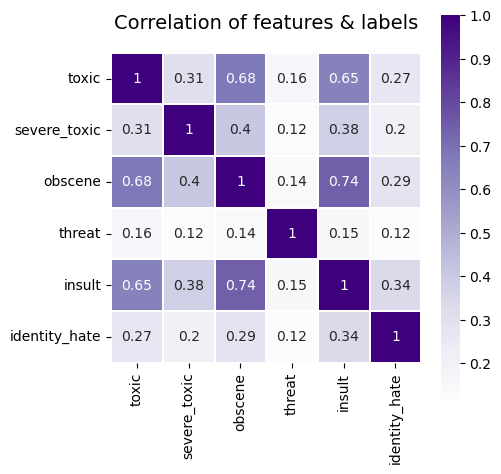

In [207]:
#correlation heatmap
data = train.iloc[:,2:]

colormap = plt.cm.plasma
plt.figure(figsize=(5,5))
plt.title('Correlation of features & labels',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap='Purples',
           linecolor='white',annot=True)

In [208]:
samples = 10000

toxic_indices = y[y['toxic'] == 1].index
random_toxic_indices = np.random.choice(toxic_indices, samples, replace=True)
non_toxic_indices = y[y['toxic'] == 0].index
random_non_toxic_indices = np.random.choice(non_toxic_indices, samples, replace=True)


severe_toxic_indices = y[y['severe_toxic'] == 1].index
random_severe_toxic_indices = np.random.choice(severe_toxic_indices, samples, replace=True)
non_severe_toxic_indices = y[y['toxic'] == 0].index
random_non_severe_toxic_indices = np.random.choice(non_toxic_indices, samples, replace=True)


obscene_indices = y[y['obscene'] == 1].index
random_obscene_indices = np.random.choice(obscene_indices, samples, replace=True)
non_obscene_indices = y[y['toxic'] == 0].index
random_non_obscene_indices = np.random.choice(non_toxic_indices, samples, replace=True)


threat_indices = y[y['threat'] == 1].index
random_threat_indices = np.random.choice(threat_indices, samples, replace=True)
non_threat_indices = y[y['toxic'] == 0].index
random_non_threat_indices = np.random.choice(non_toxic_indices, samples, replace=True)

insult_indices = y[y['insult'] == 1].index
random_insult_indices = np.random.choice(insult_indices, samples, replace=True)
non_insult_indices = y[y['toxic'] == 0].index
random_non_insult_indices = np.random.choice(non_toxic_indices, samples, replace=True)

identity_hate_indices = y[y['identity_hate'] == 1].index
random_identity_hate_indices = np.random.choice(identity_hate_indices, samples, replace=True)
non_identity_hate_indices = y[y['toxic'] == 0].index
random_non_identity_hate_indices = np.random.choice(non_toxic_indices, samples, replace=True)

new_indices = np.concatenate([
    random_toxic_indices,
    random_severe_toxic_indices,
    random_obscene_indices,
    random_threat_indices,
    random_insult_indices,
    random_identity_hate_indices,
    random_non_toxic_indices,
    random_non_severe_toxic_indices,
    random_non_obscene_indices,
    random_non_threat_indices,
    random_non_insult_indices,
    random_non_identity_hate_indices
])

# Subset the data with resampled indices
X_sampled = X[new_indices]
y_sampled = y.iloc[new_indices]



In [138]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
####working model with imbalanced data


# import pandas as pd
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
# from keras.preprocessing.text import Tokenizer
# from keras.optimizers import Adam

# # Tokenize text
# max_words = 20000
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(X)
# X_seq = tokenizer.texts_to_sequences(X)
# max_length = 200
# X_padded = pad_sequences(X_seq, maxlen=max_length)

# # Split the data
# X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# # Build CNN model
# embedding_dim = 100
# filters = 64
# kernel_size = 3

# model = Sequential()
# model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))
# model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5, seed=1))
# model.add(Dense(6, activation='softmax'))

# # 6 is for each label
# custom_optimizer = Adam(learning_rate=0.1)
# model.compile(loss='binary_crossentropy', 
#               optimizer=custom_optimizer, 
#               metrics=['accuracy', 
#                        tf.keras.metrics.Precision(), 
#                        tf.keras.metrics.Recall(), 
#                        tf.keras.metrics.AUC(name='auc-roc')],
#               class_weight=class_weights)


In [209]:
#working model with balanced dataset

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
import numpy as np


# Tokenize text
max_words = 20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_sampled)
X_seq = tokenizer.texts_to_sequences(X_sampled)
max_length = 200
X_padded = pad_sequences(X_seq, maxlen=max_length)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_padded, y_sampled, test_size=0.2, random_state=42)

# Build CNN model
embedding_dim = 100
filters = 64
kernel_size = 3

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5, seed=1))
model.add(Dense(6, activation='softmax'))

# 6 is for each label
custom_optimizer = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', 
              optimizer=custom_optimizer, 
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall(), 
                       tf.keras.metrics.AUC(name='auc-roc')])




In [202]:
# Train the model
batch_num = 128
epochs = 5
opt = model.fit(X_train, y_train, batch_size=batch_num, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/5
750/750 [==============================] - 16s 21ms/step - loss: 0.1879 - accuracy: 0.8690 - precision_12: 0.4916 - recall_11: 0.2500 - auc-roc: 0.6452 - val_loss: 0.1115 - val_accuracy: 0.9451 - val_precision_12: 0.4849 - val_recall_11: 0.2798 - val_auc-roc: 0.6538
Epoch 2/5
750/750 [==============================] - 16s 21ms/step - loss: 0.1154 - accuracy: 0.8433 - precision_12: 0.4690 - recall_11: 0.2709 - auc-roc: 0.6902 - val_loss: 0.0954 - val_accuracy: 0.9339 - val_precision_12: 0.4798 - val_recall_11: 0.2759 - val_auc-roc: 0.7137
Epoch 3/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0986 - accuracy: 0.8651 - precision_12: 0.4696 - recall_11: 0.2748 - auc-roc: 0.6760 - val_loss: 0.0889 - val_accuracy: 0.9571 - val_precision_12: 0.4844 - val_recall_11: 0.2824 - val_auc-roc: 0.6832
Epoch 4/5
750/750 [==============================] - 16s 22ms/step - loss: 0.0914 - accuracy: 0.8392 - precision_12: 0.4705 - recall_11: 0.2763 - auc-roc: 0.6775 - val_l

In [173]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 200, 100)          2000000   
                                                                 
 conv1d_41 (Conv1D)          (None, 198, 64)           19264     
                                                                 
 global_max_pooling1d_41 (G  (None, 64)                0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_88 (Dense)            (None, 128)               8320      
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_89 (Dense)            (None, 6)                 774       
                                                     

In [186]:
# Evaluate the model
# loss, accuracy = model.evaluate(X_val, y_val)
# print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

In [108]:
# Make predictions on test data
test = pd.read_csv('test.csv')
clean_test_comments = preprocess(test['comment_text'])
X_test_seq = tokenizer.texts_to_sequences(clean_test_comments)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length)

In [203]:
 predictions = model.predict(X_test_padded)

# Create a submission file
subm = pd.read_csv('sample_submission.csv')
subm[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] = predictions
subm.to_csv('cnn_submission.csv', index=False)


4787/4787 [==============================] - 6s 1ms/step


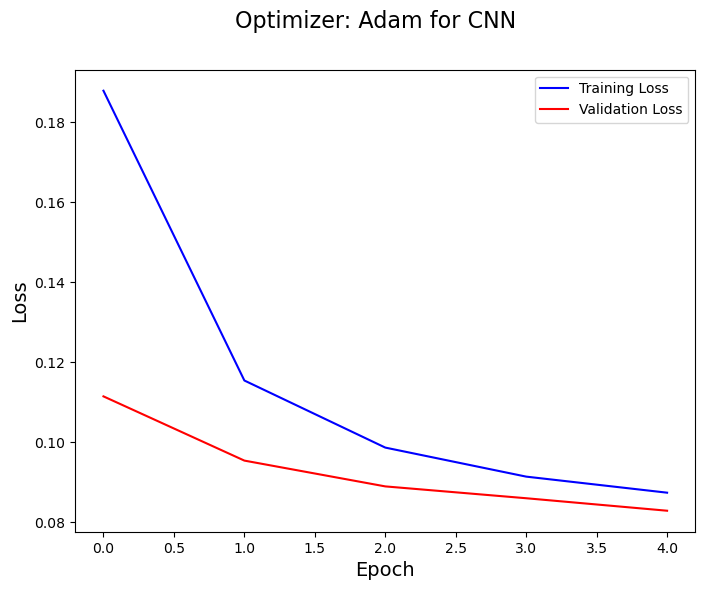

In [204]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.suptitle('Optimizer: Adam for CNN', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.plot(opt.history['loss'], color='b', label='Training Loss')
plt.plot(opt.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.show()